In [100]:
########### Import text in csv, line by line:

import csv
data = []
with open ('C:/Users/Elnaz/Desktop/sample_data.csv','r', encoding="utf-8") as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        data.append(str(row))


text = str(data)
text

'["[\'id\', \'title\', \'abstract\']", "[\'1\', \'Mountain Bike Socks\', \'Combination of natural and synthetic fibers stays dry and provides just the right cushioning.\']", "[\'2\', \'Sport-100\', \'Universal fit, well-vented, lightweight , snap-on visor.\']", "[\'3\', \'Cycling Cap\', \'Traditional style with a flip-up brim; one-size fits all.\']", "[\'4\', \'HL Mountain Frame\', \'Each frame is hand-crafted in our Bothell facility to the optimum diameter and wall-thickness required of a premium mountain frame. The heat-treated welded aluminum frame has a larger diameter tube that absorbs the bumps.\']", "[\'5\', \'Road-150\', \'This bike is ridden by race winners. Developed with the Adventure Works Cycles professional race team, it has a extremely light heat-treated aluminum frame, and steering that allows precision control.\']", \'[\\\'6\\\', \\\'Road-650\\\', "Value-priced bike with many features of our top-of-the-line models. Has the same light, stiff frame, and the quick acceler

In [101]:
import nltk
text = text.strip()
import nltk.tokenize
####### Tokenize with NLTK
from nltk.tokenize import word_tokenize
text = word_tokenize(text)
#print("\n")
#print(text[0:100])



In [102]:
####### Remove stop words with NLTK 'stopwords' data
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

text = [i for i in text if not i in stop_words]


####### Taking out common words you think should be removed
  ## E.G. you look at a list of common (or infrequent) words and want them out:
to_remove = ["plos", "and", "the"]
text = [i for i in text if not i in to_remove]


####### Only include words with over 1 character:
##Create new list to insert words:
new_text = []
##Create a for loop where you append each word that's over 1 char:
for word in text:
    word_length = len(word)
    if word_length > 2:
        new_text.append(word)
print(new_text[0:25])

["'id", "'title", "'abstract", "'Mountain", 'Bike', 'Socks', "'Combination", 'natural', 'synthetic', 'fibers', 'stays', 'dry', 'provides', 'right', 'cushioning', "'Sport-100", "'Universal", 'fit', 'well-vented', 'lightweight', 'snap-on', 'visor', "'Cycling", 'Cap', "'Traditional"]


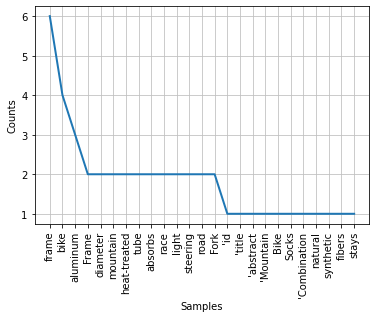

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [103]:
#####################################################################################################
   ####### Word frequencies and graphs:
#####################################################################################################

########################################
#################### Get word frequency and sort items by second element (their count), then plot
####### Sort the word frequency by frequency (2nd element):
freq = nltk.FreqDist(new_text) 
frequency = sorted(freq.items(), key=lambda x: x[1], reverse = True)
#print(frequency[0:25])

####### Get the top 25 words by frequency:
top_25_words = [x[0] for x in frequency[0:25]]
#print(top_25_words)


####### Get and print a frequency table of tokens (top 25):
freq = nltk.FreqDist(new_text) 
import matplotlib
freq.plot(25, cumulative=False)

<AxesSubplot:xlabel='Word'>

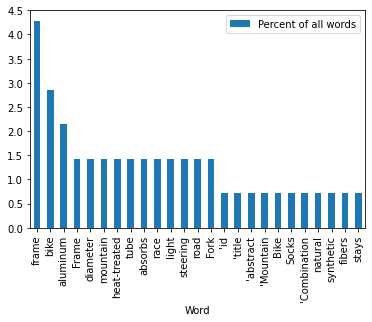

In [104]:
#####################################################################################################
   ####### Get word frequency as % of all words, sort items by second element, then plot
#####################################################################################################

####### Get the frequency of words as a percentage (and sort):
freq = nltk.FreqDist(new_text)
sum_of_freq = sum(int(x[1]) for x in freq.items())    # NOTE: same as len(clean_tokens)
freq_per = [(x[0], (float(x[1])/sum_of_freq)*100) for x in freq.items()]

### Sort and print:
freq_per = sorted(freq_per, key=lambda x: x[1], reverse = True)
#print(freq_per[0:25])


####### Show a bar chart: top 20 words as a percentage of all words in the document: 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(freq_per[0:25], columns=['Word', 'Percent of all words'])
df.plot(kind='bar', x='Word')

Text(0, 0.5, 'Percent of all bi-grams')

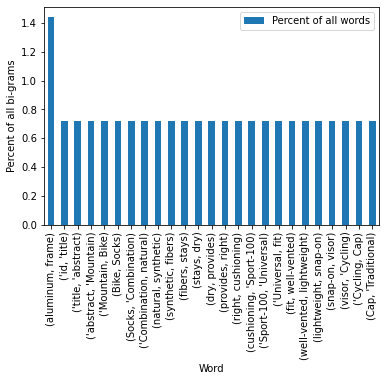

In [105]:
#####################################################################################################
   ####### Get frequency of bi-grams (as % of all bi-grams), sort items by second element, then plot
#####################################################################################################

####### Use NLTK to show bigrams (could also do, trigrams and/or ngrams)
bi_text = list(nltk.bigrams(new_text))


####### Get the frequency of words as a percentage (and sort):
freq = nltk.FreqDist(bi_text)
sum_of_freq = sum(int(x[1]) for x in freq.items())    # NOTE: same as len(clean_tokens)
freq_per = [(x[0], (float(x[1])/sum_of_freq)*100) for x in freq.items()]


### Sort and print:
freq_per = sorted(freq_per, key=lambda x: x[1], reverse = True)
#print(freq_per[0:25])

import numpy
df = pd.DataFrame(freq_per[0:25], columns=['Word', 'Percent of all words'])
df.plot(kind='bar', x='Word')
plt.ylabel('Percent of all bi-grams', fontsize=10)

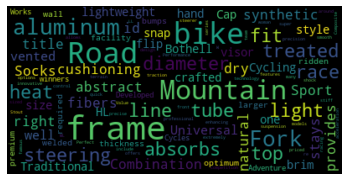

In [98]:
##### Generate word cloud. Example here: https://github.com/amueller/word_cloud/blob/master/examples/simple.py

from wordcloud import WordCloud


long_text = ' '.join(new_text)

wordcloud = WordCloud().generate(long_text)

import matplotlib.pyplot as plt
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")


wordcloud = WordCloud(max_font_size=40).generate(long_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [3]:
import pandas as pd

In [4]:
s = pd.Series([12, 8, 19, 17])
s

0    12
1     8
2    19
3    17
dtype: int64

In [5]:
s = pd.Series([12, 8, 19, 17] , index=['ali', 'taha', 'sara', 'omid'] )
s

ali     12
taha     8
sara    19
omid    17
dtype: int64

In [6]:
s = s.reindex(['ali', 'taha', 'mahsa', 'omid'])
s

ali      12.0
taha      8.0
mahsa     NaN
omid     17.0
dtype: float64

In [7]:
s[1]

8.0

In [8]:
s['mahsa']

nan

In [9]:
s['taha']

8.0

In [10]:
s

ali      12.0
taha      8.0
mahsa     NaN
omid     17.0
dtype: float64

In [11]:
s['mahsa'] = 20

In [12]:
s

ali      12.0
taha      8.0
mahsa    20.0
omid     17.0
dtype: float64

In [13]:
s.index

Index(['ali', 'taha', 'mahsa', 'omid'], dtype='object')

In [14]:
s.values

array([12.,  8., 20., 17.])

In [15]:
s[1:3]

taha      8.0
mahsa    20.0
dtype: float64

In [16]:
s[:2]

ali     12.0
taha     8.0
dtype: float64

In [17]:
s.iloc[:2]

ali     12.0
taha     8.0
dtype: float64

In [18]:
s.index.name = 'name'
s

name
ali      12.0
taha      8.0
mahsa    20.0
omid     17.0
dtype: float64

In [19]:
s.name = 'grade'
s

name
ali      12.0
taha      8.0
mahsa    20.0
omid     17.0
Name: grade, dtype: float64

In [20]:
s = s.drop('omid')
s

name
ali      12.0
taha      8.0
mahsa    20.0
Name: grade, dtype: float64

In [21]:
s = s.drop(['ali','taha'])
s

name
mahsa    20.0
Name: grade, dtype: float64

In [22]:
myser = pd.Series([12, 4, 5, 7, 2],index=['a', 'b', 'c', 'd', 'e'])
myser

a    12
b     4
c     5
d     7
e     2
dtype: int64

In [23]:
myser.pop('c')

5

In [24]:
myser

a    12
b     4
d     7
e     2
dtype: int64

In [25]:
import numpy as np
s = pd.Series([12, 4, 5,np.NaN, 7, 2],index=['a', 'b', 'c', 'd', 'e', 'f'])
s

a    12.0
b     4.0
c     5.0
d     NaN
e     7.0
f     2.0
dtype: float64

In [26]:
s.isna()

a    False
b    False
c    False
d     True
e    False
f    False
dtype: bool

In [27]:
s.notna()

a     True
b     True
c     True
d    False
e     True
f     True
dtype: bool

In [28]:
s

a    12.0
b     4.0
c     5.0
d     NaN
e     7.0
f     2.0
dtype: float64

In [29]:
s.isin([5])

a    False
b    False
c     True
d    False
e    False
f    False
dtype: bool

In [30]:
s

a    12.0
b     4.0
c     5.0
d     NaN
e     7.0
f     2.0
dtype: float64

In [31]:
sc = s.copy()

In [32]:
s['b']=89
s

a    12.0
b    89.0
c     5.0
d     NaN
e     7.0
f     2.0
dtype: float64

In [33]:
sc

a    12.0
b     4.0
c     5.0
d     NaN
e     7.0
f     2.0
dtype: float64

In [34]:
s

a    12.0
b    89.0
c     5.0
d     NaN
e     7.0
f     2.0
dtype: float64

In [35]:
s.sort_values()

f     2.0
c     5.0
e     7.0
a    12.0
b    89.0
d     NaN
dtype: float64

In [36]:
s.sort_values(ascending=False)

b    89.0
a    12.0
e     7.0
c     5.0
f     2.0
d     NaN
dtype: float64

In [37]:
s

a    12.0
b    89.0
c     5.0
d     NaN
e     7.0
f     2.0
dtype: float64

In [38]:
s.rank()

a    4.0
b    5.0
c    2.0
d    NaN
e    3.0
f    1.0
dtype: float64

In [39]:
s = pd.Series([12, 4, 5,np.NaN, 7, 2],index=['a', 'b', 'c', 'a', 'e', 'b'])
s

a    12.0
b     4.0
c     5.0
a     NaN
e     7.0
b     2.0
dtype: float64

In [40]:
s['b']

b    4.0
b    2.0
dtype: float64

In [41]:
s.index.is_unique

False

In [42]:
s.describe()

count     5.000000
mean      6.000000
std       3.807887
min       2.000000
25%       4.000000
50%       5.000000
75%       7.000000
max      12.000000
dtype: float64

In [43]:
s.count()

5

In [44]:
s.quantile(0.5)

5.0

In [45]:
s.quantile([0.25,0.75])

0.25    4.0
0.75    7.0
dtype: float64

In [46]:
s

a    12.0
b     4.0
c     5.0
a     NaN
e     7.0
b     2.0
dtype: float64

In [47]:
s >= 5

a     True
b    False
c     True
a    False
e     True
b    False
dtype: bool

In [48]:
s.where(s >= 5)

a    12.0
b     NaN
c     5.0
a     NaN
e     7.0
b     NaN
dtype: float64

In [49]:
myser =  pd.Series(['a','b','a','c','d'])
myser

0    a
1    b
2    a
3    c
4    d
dtype: object

In [50]:
myser.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [51]:
myser.drop_duplicates(keep='last')

1    b
2    a
3    c
4    d
dtype: object

In [52]:
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [53]:
s.add_prefix('item_')

item_0    1
item_1    2
item_2    3
item_3    4
dtype: int64

In [54]:
s.add_suffix('_item')

0_item    1
1_item    2
2_item    3
3_item    4
dtype: int64

In [55]:
a = pd.Series([1, 10, 3])
b = pd.Series([4, 5, 6])

In [56]:
a + b

0     5
1    15
2     9
dtype: int64

In [57]:
a.add(b)

0     5
1    15
2     9
dtype: int64

In [58]:
a.subtract(b)

0   -3
1    5
2   -3
dtype: int64

In [59]:
a.multiply(b)

0     4
1    50
2    18
dtype: int64

In [60]:
a.pow(b)

0         1
1    100000
2       729
dtype: int64

In [61]:
a.divide(b)

0    0.25
1    2.00
2    0.50
dtype: float64

In [62]:
a.mod(b)

0    1
1    0
2    3
dtype: int64

In [63]:
a = pd.Series([1, 10, 3],index=['a','b','c'] )
b = pd.Series([4, 5, 6],index=['a','b','d'] )

In [64]:
a.add(b)

a     5.0
b    15.0
c     NaN
d     NaN
dtype: float64

In [65]:
a.add(b, fill_value=0)

a     5.0
b    15.0
c     3.0
d     6.0
dtype: float64

In [66]:
# eq , ne , gt , ge , lt , le

In [67]:
s1 = pd.Series([8, 2, 12, 6, 5, 4])
s2 = pd.Series([20, 2, 7, 6, 2, 17])

In [68]:
s1.eq(s2)

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [69]:
s1.ne(s2)

0     True
1    False
2     True
3    False
4     True
5     True
dtype: bool

In [70]:
s1.gt(s2)

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [71]:
s1.lt(s2)

0     True
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [72]:
# argmax , argmin() , idxmin() , idxmax()

In [73]:
score = pd.Series({'Java' : 15, 'C++' : 20, 'Python' : 12 , 'Pascal' : 9})

In [74]:
score

Java      15
C++       20
Python    12
Pascal     9
dtype: int64

In [75]:
score.argmax()

1

In [76]:
score.argmin()

3

In [77]:
score.idxmin()

'Pascal'

In [78]:
score.idxmax()

'C++'

In [79]:
# cumsum , cumprod (cumulative)

In [80]:
s = pd.Series([3, 2, np.nan, 5, 0])
s

0    3.0
1    2.0
2    NaN
3    5.0
4    0.0
dtype: float64

In [81]:
s.cumsum()

0     3.0
1     5.0
2     NaN
3    10.0
4    10.0
dtype: float64

In [82]:
s.cumprod()

0     3.0
1     6.0
2     NaN
3    30.0
4     0.0
dtype: float64

In [83]:
# value_counts

In [84]:
s = pd.Series(['c','a','d','a','a','c','b','b','c','c'])
s

0    c
1    a
2    d
3    a
4    a
5    c
6    b
7    b
8    c
9    c
dtype: object

In [85]:
s.value_counts()

c    4
a    3
b    2
d    1
dtype: int64

In [86]:
pd.value_counts(s.values, sort=False)

c    4
a    3
d    1
b    2
dtype: int64

In [87]:
# unique

In [88]:
s.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [89]:
pd.Series(['c','a','d','a','a','c','b','b','c','c']).unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [90]:
# append

In [91]:
s1 = pd.Series([8, 2, 12, 6, 5, 4])
s2 = pd.Series([20, 2, 7, 6, 2, 17] , index=[6,7,8,9,10,11])

In [92]:
s1.append(s2)

0      8
1      2
2     12
3      6
4      5
5      4
6     20
7      2
8      7
9      6
10     2
11    17
dtype: int64

In [93]:
# combine

In [94]:
s1 = pd.Series({'ali' : 16 , 'sara' : 17})
s2 = pd.Series({'ali' : 19 , 'sara' : 15 , 'taha' : 18})

In [95]:
s1.combine(s2, max)

ali     19.0
sara    17.0
taha     NaN
dtype: float64

In [96]:
s1.combine(s2, max, fill_value=0)

ali     19
sara    17
taha    18
dtype: int64

In [97]:
# apply

In [98]:
s = pd.Series([10, 5, 100])
s

0     10
1      5
2    100
dtype: int64

In [99]:
s.apply(np.log10)

0    1.00000
1    0.69897
2    2.00000
dtype: float64

In [100]:
s

0     10
1      5
2    100
dtype: int64

In [101]:
def f(x):
    return x**2
s.apply(f)

0      100
1       25
2    10000
dtype: int64

In [102]:
lam = lambda x: x**2
s.apply(lam)

0      100
1       25
2    10000
dtype: int64

In [103]:
s

0     10
1      5
2    100
dtype: int64

In [104]:
def myfunc(x, y):
    return x - y

s.apply(myfunc, args=(2,))

0     8
1     3
2    98
dtype: int64

In [105]:
s

0     10
1      5
2    100
dtype: int64

In [106]:
def f(r, **kwargs):
    for i in kwargs:
        r += kwargs[i]
    return r       

s.apply(f, x=3, y=2)

0     15
1     10
2    105
dtype: int64

In [107]:
# transform

In [108]:
s = pd.Series([10, 4, 9])
s.transform([np.sqrt, np.log10])

,sqrt,log10
0,3.162278,1.000000
1,2.000000,0.602060
2,3.000000,0.954243


In [109]:
# agg : aggregate

In [110]:
s = pd.Series([10, 4, 9, 2, 18, 6])
s.agg(['min','max'])

min     2
max    18
dtype: int64

In [111]:
# nlargest

In [112]:
data = {'a' : 6, 'b' : 3 , 'c' : 8 , 'd' : 5 , 'e' : 9 , 'f' : 3 , 'g':5 , 'h' : 4 , 'i' : 5}
s = pd.Series(data)
s

a    6
b    3
c    8
d    5
e    9
f    3
g    5
h    4
i    5
dtype: int64

In [113]:
s.nlargest()

e    9
c    8
a    6
d    5
g    5
dtype: int64

In [114]:
s.nlargest(4, keep='last')

e    9
c    8
a    6
i    5
dtype: int64

In [115]:
s.nlargest(4, keep='all')

e    9
c    8
a    6
d    5
g    5
i    5
dtype: int64

In [116]:
s.nsmallest()

b    3
f    3
h    4
d    5
g    5
dtype: int64

In [117]:
# groupby

In [118]:
i = ['BMW', 'BMW', 'Benz', 'Benz']
d = [220, 180, 230, 200]

In [119]:
s = pd.Series(d, index=i , name='MaxSpeed')
s

BMW     220
BMW     180
Benz    230
Benz    200
Name: MaxSpeed, dtype: int64

In [120]:
s.groupby(i).max()

BMW     220
Benz    230
Name: MaxSpeed, dtype: int64

In [121]:
s.groupby(i).mean()

BMW     200.0
Benz    215.0
Name: MaxSpeed, dtype: float64

In [122]:
# between

In [123]:
s = pd.Series([15, 9, 18, 20])
s.between(10,20)

0     True
1    False
2     True
3     True
dtype: bool

In [124]:
# dropna

In [125]:
s = pd.Series([15, np.nan, 9, 18, np.nan, 20])
s

0    15.0
1     NaN
2     9.0
3    18.0
4     NaN
5    20.0
dtype: float64

In [126]:
s.dropna(inplace=True)

In [127]:
s

0    15.0
2     9.0
3    18.0
5    20.0
dtype: float64

In [128]:
# to_numpy

In [129]:
s = pd.Series([15, 9, 18, 20])
arr = s.to_numpy()
arr

array([15,  9, 18, 20], dtype=int64)

In [130]:
type(s)

pandas.core.series.Series

In [131]:
type(arr)

numpy.ndarray

In [132]:
# to_dict

In [133]:
s = pd.Series([15, 9, 18, 20])
d = s.to_dict()
d

{0: 15, 1: 9, 2: 18, 3: 20}

In [134]:
s

0    15
1     9
2    18
3    20
dtype: int64

In [135]:
type(d)

dict

In [136]:
# replcae

In [137]:
s = pd.Series([15, 9, 18, 20])
s.replace(9, 10)

0    15
1    10
2    18
3    20
dtype: int64

In [138]:
# repeat

In [139]:
s = pd.Series([15, 9, 18, 20])
s.repeat(3)

0    15
0    15
0    15
1     9
1     9
1     9
2    18
2    18
2    18
3    20
3    20
3    20
dtype: int64

In [140]:
# MultiIndex

In [141]:
lst = [['BMW','BMW','Benz','Benz'] , ['A','B','A','B']]
mi = pd.MultiIndex.from_arrays(lst, names=('Machine', 'Class'))
d = [220, 180, 230, 200]
s = pd.Series(d, index=mi)
s

Machine  Class
BMW      A        220
         B        180
Benz     A        230
         B        200
dtype: int64

In [142]:
s.groupby(level='Machine').max()

Machine
BMW     220
Benz    230
dtype: int64

In [143]:
s.groupby(level=0).max()

Machine
BMW     220
Benz    230
dtype: int64

In [144]:
s.groupby(level='Class').max()

Class
A    230
B    200
dtype: int64

In [145]:
s.groupby(level=1).max()

Class
A    230
B    200
dtype: int64